In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline


In [6]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [9]:
# use tip
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Basic Data Check

In [10]:
df.shape

(244, 7)

In [11]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [14]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [15]:
df.isnull().sum() # kiểm tra xem có phần tử nào null không
    

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [18]:
# chuyển mấy cột từ category sang obkject

cat_cols = df.select_dtypes(['category']).columns
df[cat_cols] = df[cat_cols].astype("object")
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

## Univariate - Non Visual Statistical Analysis
### Univariate (phân tích 1 biến duy nhất)


In [23]:
# đây là kiểu phân tích không xử lí theo đồ thị 
def show_data(discrete_data):
    for col_name in discrete_data:
        print("*" * 10, col_name, "*" * 10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        
        print("Value_Counts: \n", discrete_data[col_name].value_counts())
        print()
        print()

discrete_df = df.select_dtypes(include = ['object'])
# dữ liệu kiểu object
numerical_df = df.select_dtypes(include = ['float64', 'int64'])
# dữ liệu số thực
show_data(discrete_df)
show_data(numerical_df)

********** sex **********
count                 244
nunique                 2
unique     [Female, Male]
Name: sex, dtype: object
Value_Counts: 
 sex
Male      157
Female     87
Name: count, dtype: int64


********** smoker **********
count            244
nunique            2
unique     [No, Yes]
Name: smoker, dtype: object
Value_Counts: 
 smoker
No     151
Yes     93
Name: count, dtype: int64


********** day **********
count                        244
nunique                        4
unique     [Sun, Sat, Thur, Fri]
Name: day, dtype: object
Value_Counts: 
 day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64


********** time **********
count                  244
nunique                  2
unique     [Dinner, Lunch]
Name: time, dtype: object
Value_Counts: 
 time
Dinner    176
Lunch      68
Name: count, dtype: int64


********** total_bill **********
count                                                    244
nunique                                                

NameError: name 'discrete_df' is not defined

## Bivariate - Non Visual Statistical Analysis
### xét mối tương quan giữa 2 biến

In [24]:
# num vs num
numerical_df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [26]:
pd.crosstab(discrete_df['sex'], discrete_df['smoker'], normalize = 'index'
           )

smoker,No,Yes
sex,,
Female,0.620690,0.379310
Male,0.617834,0.382166


In [31]:
g = df.groupby('sex')
g['total_bill'].agg(['min', 'max','mean', 'count'])

,min,max,mean,count
sex,,,,
Female,3.07,44.30,18.056897,87
Male,7.25,50.81,20.744076,157


## Univariate Plotting For Numerical Columns - Histogram, KDE, CDF, and Box Plot

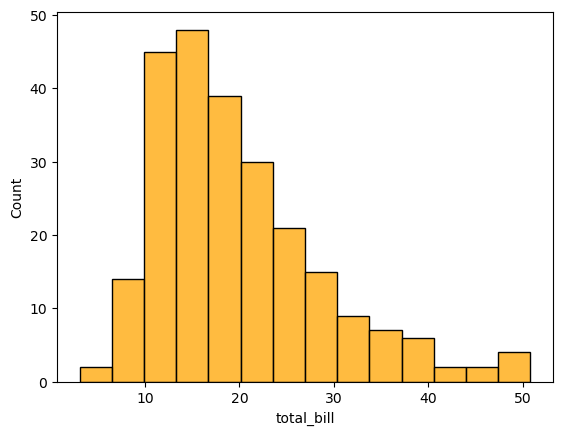

In [37]:
# total bill - Histogram and Box Plot  + Kde and ecdf
sns.histplot(data = df, x = 'total_bill', color = 'orange')
plt.show()

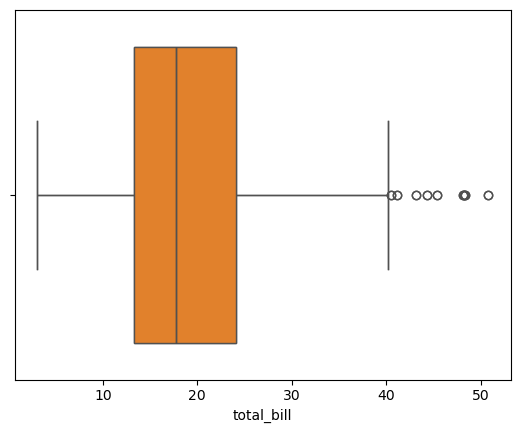

In [39]:
sns.boxplot(data = df, x = 'total_bill')
plt.show()

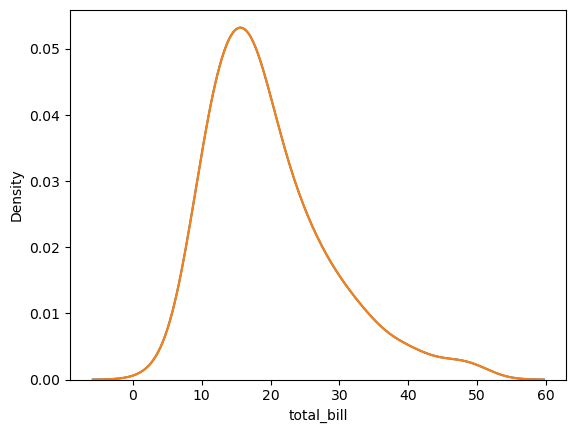

In [41]:
# us kde
sns.kdeplot(data = df, x = 'total_bill')
plt.show()


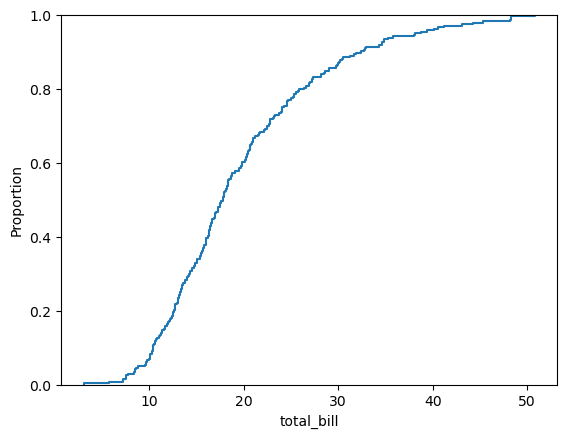

In [42]:
# ecdfplot
sns.ecdfplot(data=df, x="total_bill")
plt.show()

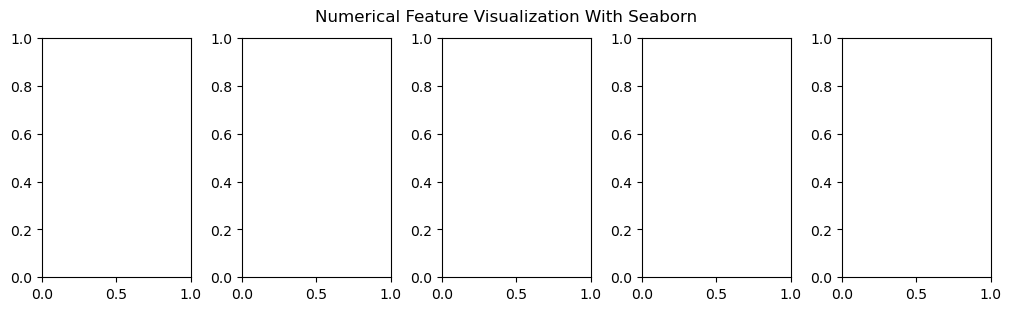

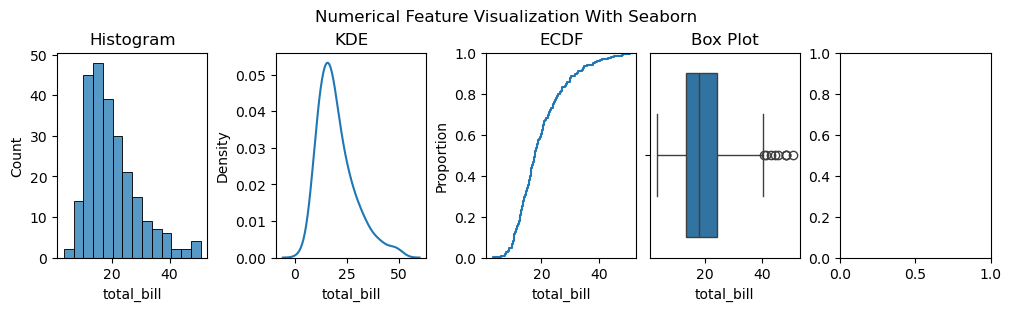

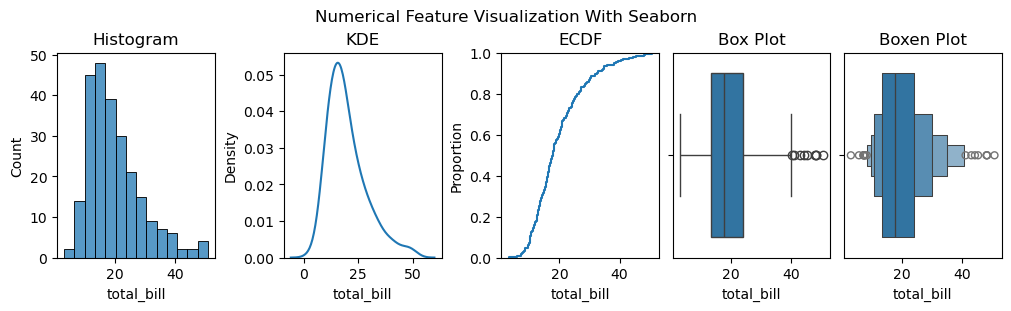

In [45]:
# tạo 5 biểu đồ
fig, axs = plt.subplots(1, 5, figsize = (10, 3), layout = "constrained")

fig.suptitle("Numerical Feature Visualization With Seaborn")

axs[0].set_title("Histogram")
sns.histplot(data = df, x = "total_bill", ax = axs[0])# ax dùng để chỉ rõ đang vẽ hình nào

axs[1].set_title("KDE")
sns.kdeplot(data = df, x = "total_bill", ax = axs[1])

axs[2].set_title("ECDF")
sns.ecdfplot(data = df, x = "total_bill", ax = axs[2])

axs[3].set_title("Box Plot")
sns.boxplot(data = df , x = "total_bill", ax = axs[3])

axs[4].set_title("Boxen Plot")
sns.boxenplot(data = df, x = "total_bill", ax = axs[4])

plt.show()

## Univariate Plotting For Categorical Columns - Count Plot

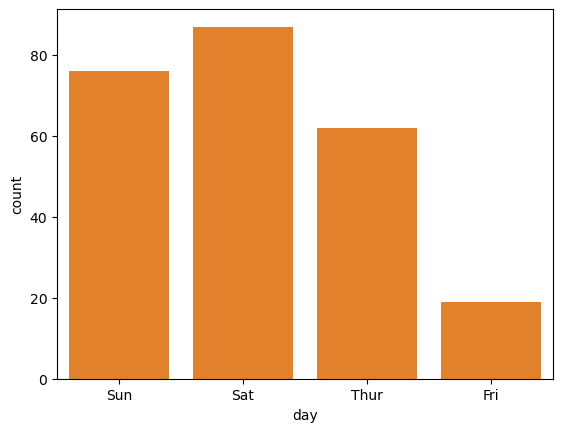

In [47]:
sns.countplot(data = df, x = 'day')
plt.show()

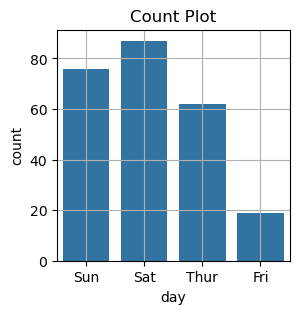

In [48]:
# Use Subplot

fig, ax = plt.subplots(figsize=(3,3))

ax.set_title("Count Plot")
sns.countplot(data=df, x='day', ax=ax)

plt.grid(True)

plt.show()

## Bivariate Plotting For Num vs Num Columns - Line Plot, Scatter Plot
## hexbin Plot, Heat Map, and Pair Plot

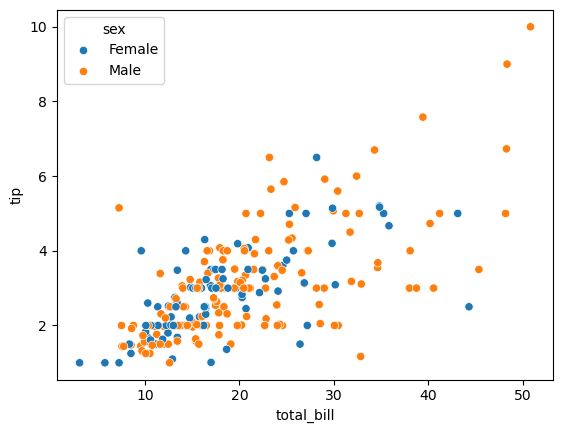

In [51]:
sns.scatterplot(data = df, x = 'total_bill', y = 'tip', hue = 'sex')
plt.show()

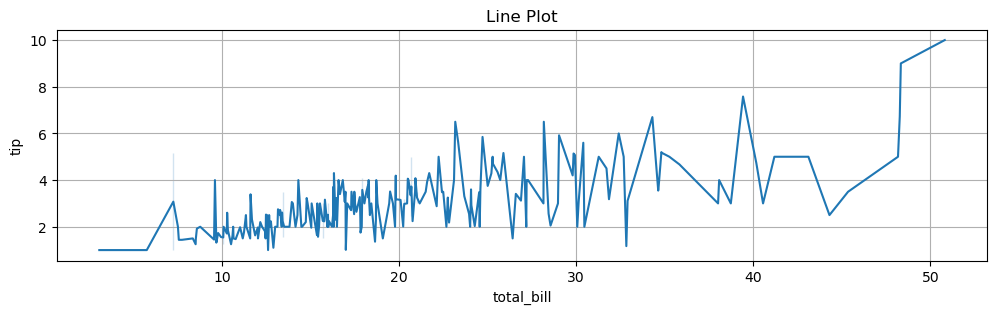

In [52]:
# use lineplot()

fig, ax = plt.subplots(figsize = (12, 3))

ax.set_title("Line Plot")
sns.lineplot(data = df, x=  'total_bill', y = 'tip', ax =ax)
plt.grid()

plt.show()

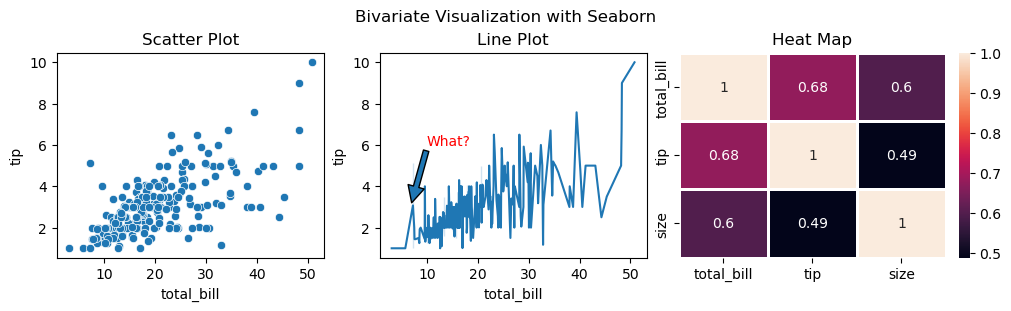

In [59]:
fig, axs = plt.subplots(1, 3, figsize = (10, 3), layout = "constrained")

fig.suptitle("Bivariate Visualization with Seaborn")

axs[0].set_title("Scatter Plot")
sns.scatterplot(data = df, x = 'total_bill', y = 'tip', ax =axs[0])

axs[1].set_title("Line Plot")
sns.lineplot(data = df, x = 'total_bill', y = 'tip', ax = axs[1])
axs[1].annotate("What?", xytext = (10, 6), color = "red",
                xy = (7, 3.2),arrowprops={} )

axs[2].set_title("Heat Map")
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, linewidths=0.8, ax=axs[2])
# annot = false heatmap chỉ hiện màu sacwcs không hiện số
plt.show()

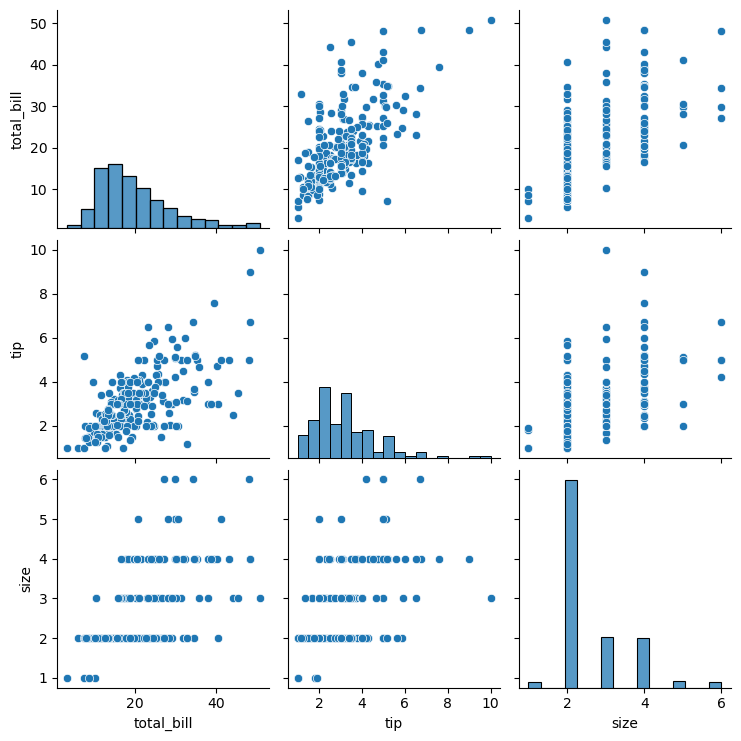

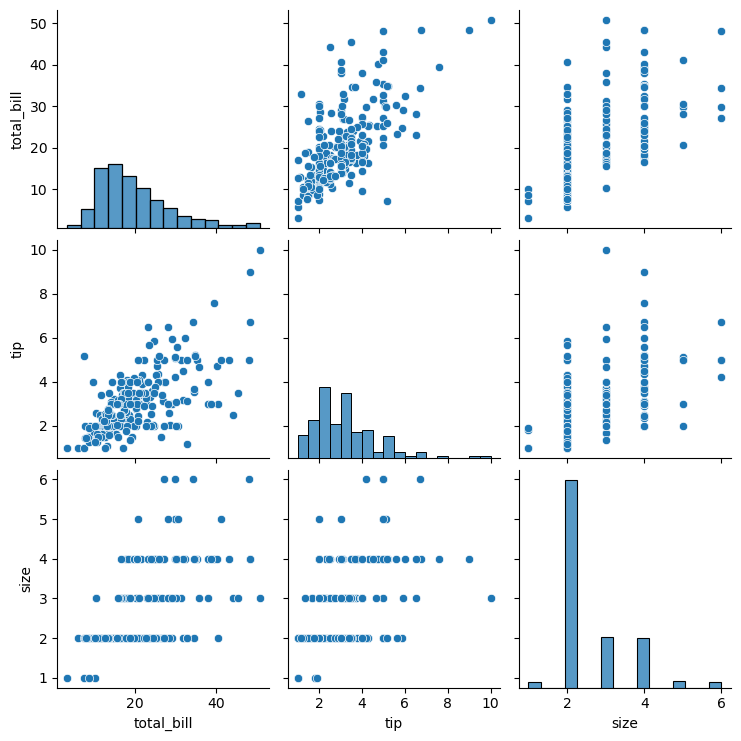

In [61]:
# Use Pair Plot

sns.pairplot(df)
plt.show()

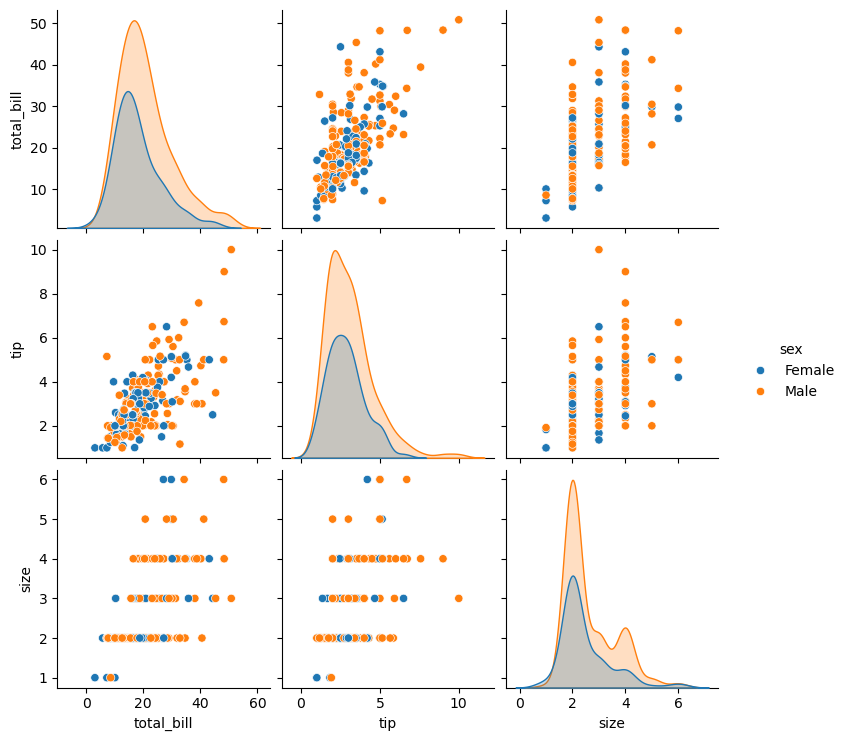

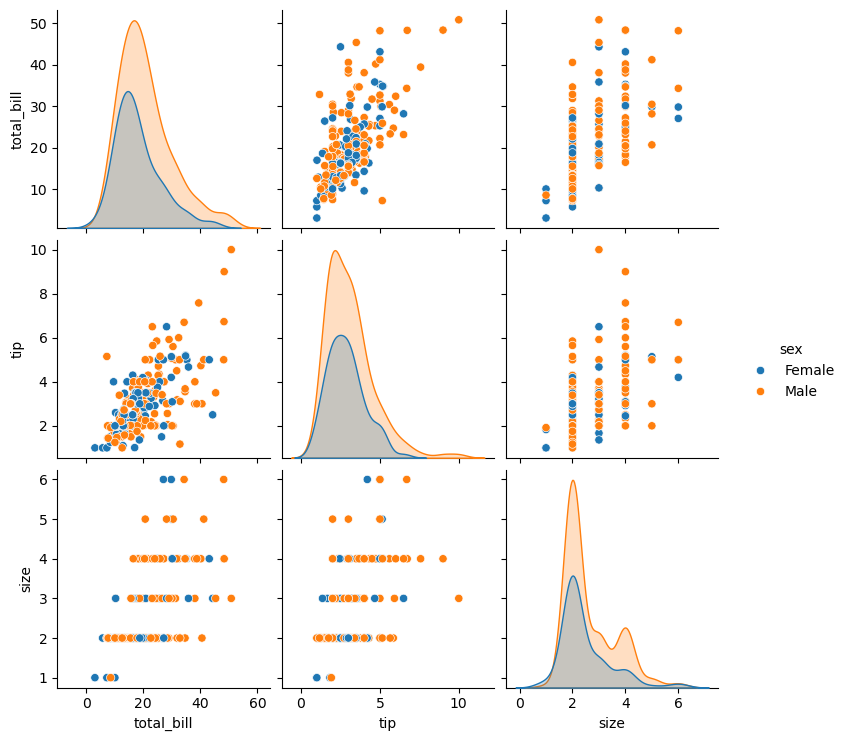

In [63]:

sns.pairplot(df, hue="sex")
plt.show()

## Bivariate Plotting For Num vs Categorical Columns - Box Plot, Violin Plot, Boxen Plot, and Histogram Plot

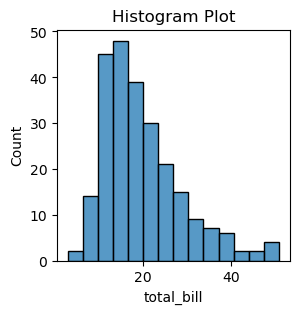

In [68]:
fig, ax = plt.subplots(figsize = (3, 3))

ax.set_title("Histogram Plot")
sns.histplot(data = df, x = 'total_bill', ax = ax)

plt.show()

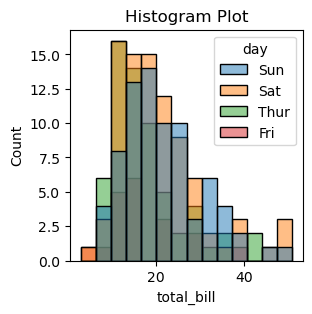

In [65]:
fig, ax = plt.subplots(figsize = (3, 3))

ax.set_title("Histogram Plot")
sns.histplot(data = df, x = 'total_bill', hue = 'day', ax = ax)

plt.show()

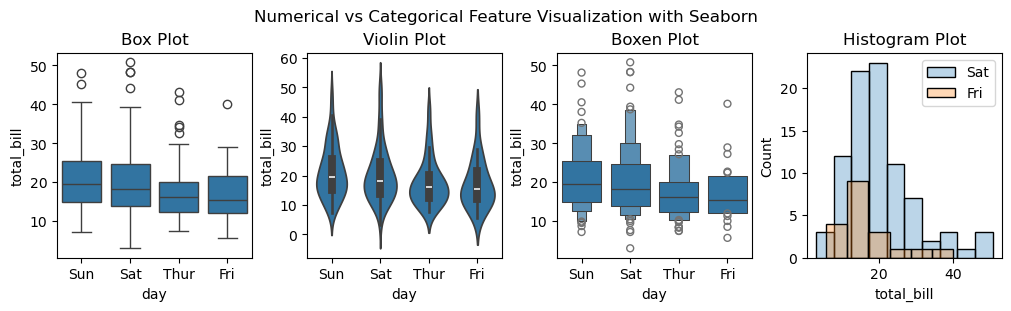

In [71]:
fig, axs = plt.subplots(1, 4, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Numerical vs Categorical Feature Visualization with Seaborn")

axs[0].set_title("Box Plot")
sns.boxplot(data=df, x='day', y='total_bill', ax=axs[0])

axs[1].set_title("Violin Plot")
sns.violinplot(data=df, x='day', y='total_bill', ax=axs[1])

axs[2].set_title("Boxen Plot")
sns.boxenplot(data=df, x='day', y='total_bill', ax=axs[2])

axs[3].set_title("Histogram Plot")
sns.histplot(data = df.loc[df['day'] == "Sat"], x = 'total_bill', alpha = 0.3, ax =axs[3], label = 'Sat')
sns.histplot(data = df.loc[df['day'] == "Fri"], x = 'total_bill', alpha = 0.3, ax =axs[3], label = 'Fri')
axs[3].legend()
plt.show()


## Multi-Plot Grid Using Facetgrid

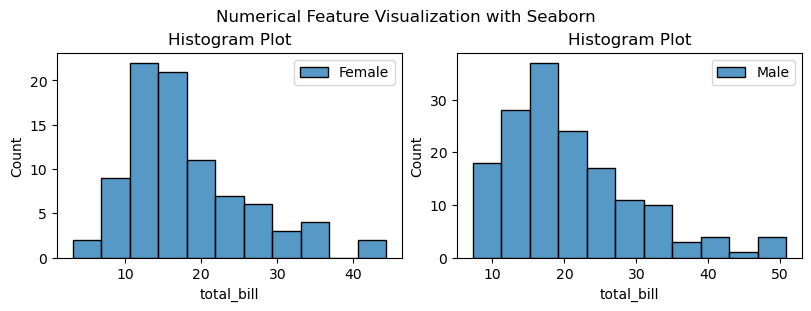

In [72]:
# ví dụ tôi muốn tách 2 lần là male và female tôi phải làm 2 lần với sns.subplots 
# Implementation without FacetGrid

fig, axs = plt.subplots(1, 2, figsize=(8, 3), constrained_layout=True)
fig.suptitle("Numerical Feature Visualization with Seaborn")

axs[0].set_title("Histogram Plot")
sns.histplot(data=df.loc[df['sex']=='Female'], x='total_bill', ax=axs[0], label="Female")
axs[0].legend()

axs[1].set_title("Histogram Plot")
sns.histplot(data=df.loc[df['sex']=='Male'], x='total_bill', ax=axs[1], label="Male")
axs[1].legend()

plt.show()

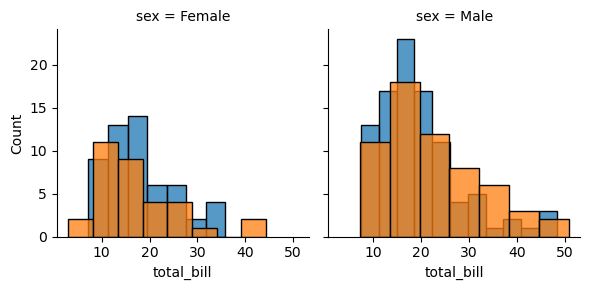

In [77]:
grid = sns.FacetGrid(df, col = 'sex', hue = 'smoker')
grid.map(sns.histplot, 'total_bill');
plt.show()

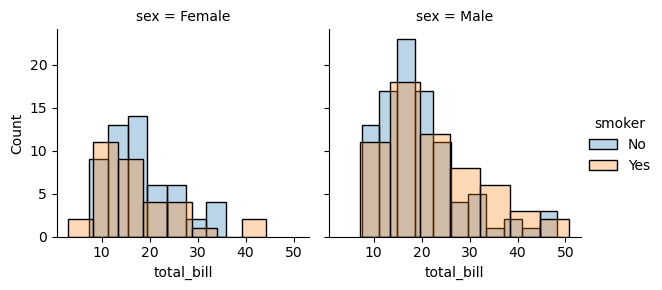

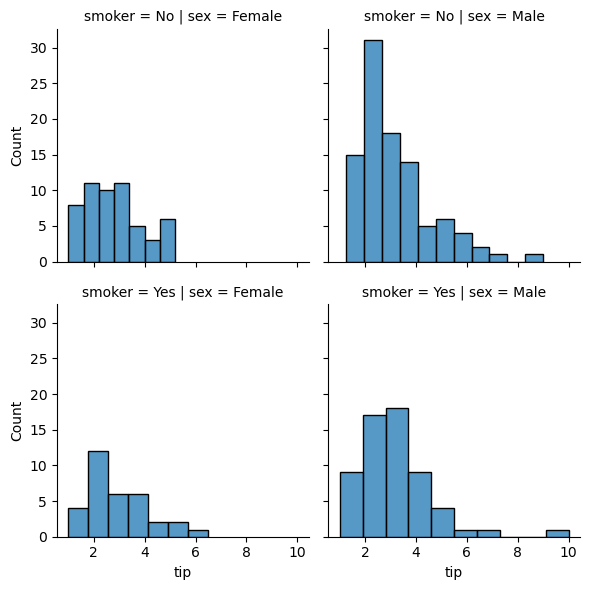

In [81]:

grid = sns.FacetGrid(df, col="sex", row="smoker")
grid.map(sns.histplot, "tip");
plt.show()

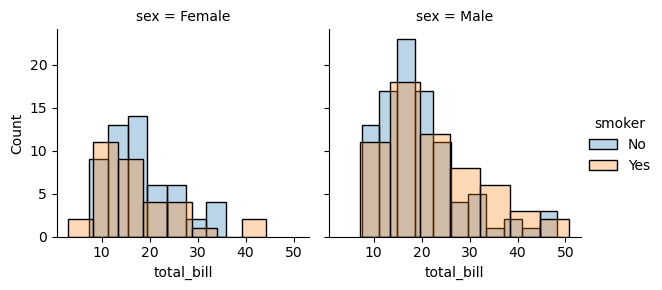

In [82]:

g = sns.FacetGrid(df, col="sex", hue="smoker")
g.map(sns.histplot, "total_bill", alpha=.3);
g.add_legend()
plt.show()

In [83]:
# Scatterplot

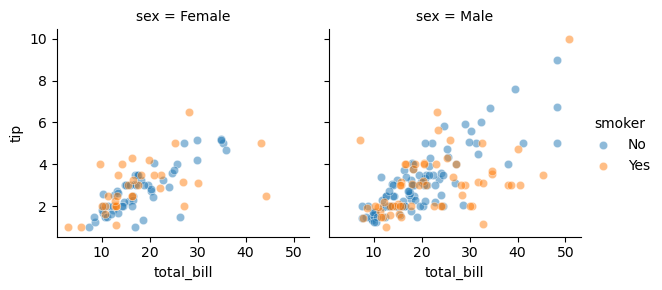

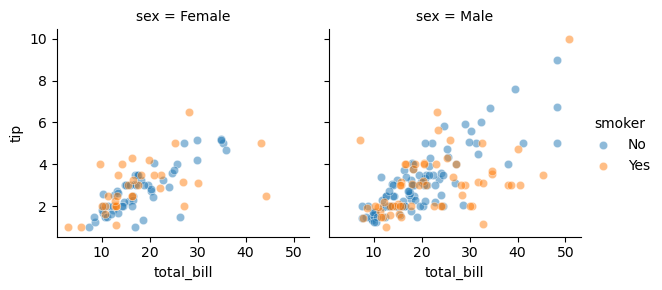

In [85]:
g = sns.FacetGrid(df, col="sex", hue="smoker")
g.map(sns.scatterplot, "total_bill", "tip", alpha=.5)
g.add_legend()

plt.show()

## Bivariate Plotting For Cat vs Categorical Columns - Grouped Count Plot

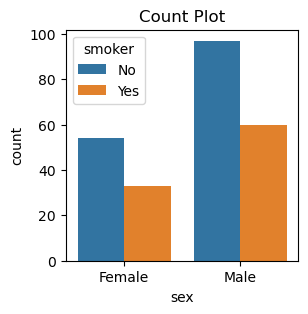

In [86]:
fig, ax = plt.subplots(figsize = (3, 3))
ax.set_title("Count Plot")

sns.countplot(data = df, x = 'sex', hue = 'smoker', ax =ax)
plt.show()